In [1]:
import subprocess
import pathlib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
src_path = str(pathlib.Path().resolve().parents[1]) # calcula path a directorio src
subprocess.run(["make"], cwd = src_path + "/cpp") # build del cpp

make: Nothing to be done for 'all'.


CompletedProcess(args=['make'], returncode=0)

# Experimento (1)

In [3]:
def crear_competencia(cant_participantes, cant_partidos):
    # dada una cantidad de participantes y de partidos
    # crea 4 np array:
    # lista de ganadores de cada partido
    # lista de perdedores de cada partido
    # lista de 1's(puntaje de los ganadores)
    # lista de 0's(puntaje de los perdedores)
    
    ganadores = np.random.choice(cant_participantes, cant_partidos, replace = True)

    perdedores = np.array([])

    for g in ganadores:

        perdedores = np.append(perdedores, 
                               np.random.choice(np.delete(np.arange(cant_participantes), g)))

    perdedores = perdedores.astype(int)
        
    puntajeG = np.ones(cant_partidos, dtype = int)
    puntajeP = np.zeros(cant_partidos, dtype = int)
    
    return ganadores+1, perdedores+1, puntajeG, puntajeP

def escribir_tabla(file_name, cant_participantes, cant_partidos, g, p, pg, pp):
    # dada 4 listas: lista de ganadores, perdedores, 
    # puntaje ganadores y puntaje perdedores,
    # y dado la cantidad de participantes y de partidos, junto a un nombre de archivo
    # genera el archivo "file_name" con la tabla de la competencia(formato enunciado)
    
    with open(file_name,"w") as file:
    
        file.write(str(cant_participantes) + " " + str(cant_partidos))

        for i in range(cant_partidos):

            file.write("\n" + "1 " + str(g[i]) + " " + str(pg[i]) + 
                       " " + str(p[i]) + " " + str(pp[i]))

In [4]:
def leer_ranking(file_name):
    # Dada la direccion de un archivo con el ranking
    # resultado de una competencia, devuelve un arreglo
    # con el rating ordenado por numero de competidor
    
    with open(file_name, "r") as file:
        
        str_out = file.read()
        
    out = []
    
    word = ""
    
    for c in str_out:
        
        if c != "\n":
            
            word += c
            
        else:
            
            out.append(float(word))
            word = ""
        
    return np.array(out)

In [5]:
def calcular_ranking(file_in, file_out, mode = "0"):
    
    # Dado en archivo en formato tabla, procesa los datos con CMM, WP o RPI y
    # los escribe en un archivo de salida en el directorio local
    
    # Corre test
    src_path = str(pathlib.Path().resolve().parents[1]) # calcula path a directorio src
    local_path = str(pathlib.Path().resolve()) # calcula path directorio local
    tabla_path = "/" + file_in
    res_path = "/" + file_out

    subprocess.run(["./tp1", local_path + tabla_path, 
                             local_path + res_path, 
                               mode], 
                   cwd = src_path + "/cpp")

In [6]:
def experimento_1(cant_participantes, cant_partidos):
    # Dada una cantidad de participantes y partidos
    # crea un torneo con dicha cantidad de participantes y partidos
    # Luego simula que el Grupo A ya termino sus partidos y
    # que se encuentran jugando los equipos del Grupo B
    # Con esto se analiza el comportamiento de ranking (rating y posicion)
    # de un equipo del grupo A (el que tiene indice 1 en la tabla) y
    # devuelve una lista con el historial de ranking de dicho equipo

    # Grupo A
    gA, pA, pgA, ppA = crear_competencia(cant_participantes//2, cant_partidos//2)

    # Grupo B
    gB, pB, pgB, ppB = crear_competencia(cant_participantes//2, cant_partidos//2)

    g = np.append(gA, gB+(cant_participantes//2))
    p = np.append(pA, pB+(cant_participantes//2))
    pg = np.append(pgA, pgB)
    pp = np.append(ppA, ppB)

    ratings_h = []
    poss_h = []

    for n_partido in range(cant_partidos//2, cant_partidos):

        file_in = "torneos/exp_1_e"+str(cant_participantes)+"_p"+str(n_partido)+".in"
        file_out = "torneos/res_1_e"+str(cant_participantes)+"_p"+str(n_partido)+".out"

        # Escribo archivo
        escribir_tabla(file_in,cant_participantes,n_partido,g,p,pg,pp)

        # Calculo ranking
        calcular_ranking(file_in,file_out)

        # Leo ranking
        res = leer_ranking(file_out)

        ratings_h.append(res[0])
        pos_h = 1

        for r in res: 

            if r > res[0]: pos_h+=1

        poss_h.append(pos_h)
        
    return ratings_h, poss_h

## 6 paticipantes - 12 partidos

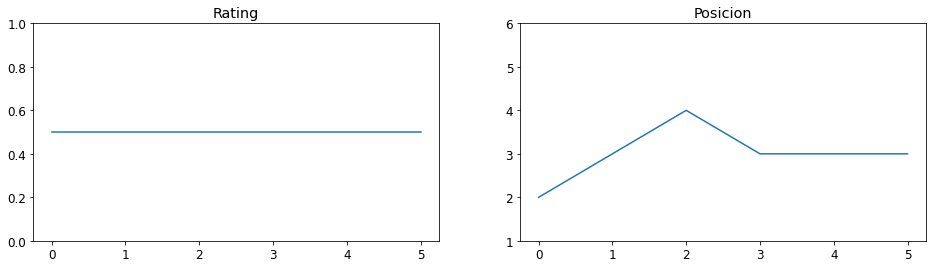

In [7]:
np.random.seed(8)

cant_participantes = 6
cant_partidos = 12

rating, pos = experimento_1(cant_participantes,cant_partidos)

matplotlib.rcParams.update({'font.size': 12})
plt.figure(figsize = (16,4))

# Plot rating
plt.subplot(1,2,1)
plt.title("Rating")
plt.plot(rating)
plt.xticks(list(range(cant_partidos//2)))
plt.ylim(0,1)

# Plot posicion
plt.subplot(1,2,2)
plt.title("Posicion")
plt.plot(pos)
plt.xticks(list(range(cant_partidos//2)))
plt.yticks(list(range(1,cant_participantes+1)))

plt.show()

## 10 participantes - 100 partidos

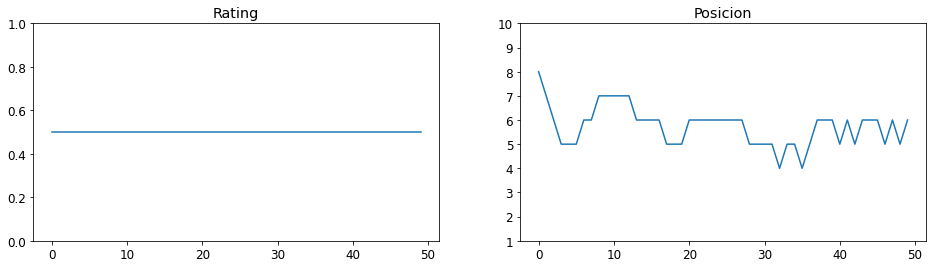

In [8]:
cant_participantes = 10
cant_partidos = 100

rating, pos = experimento_1(cant_participantes,cant_partidos)

plt.figure(figsize = (16,4))

# Plot rating
plt.subplot(1,2,1)
plt.title("Rating")
plt.plot(rating)
plt.ylim(0,1)

# Plot posicion
plt.subplot(1,2,2)
plt.title("Posicion")
plt.plot(pos)
plt.yticks(list(range(1,cant_participantes+1)))

plt.show()

## 20 participantes - 200 partidos

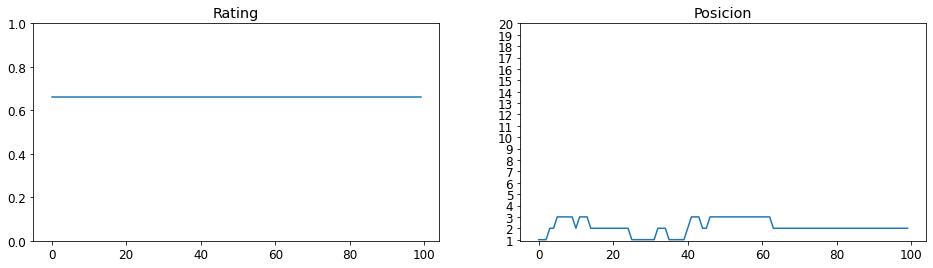

In [9]:
cant_participantes = 20
cant_partidos = 200

rating, pos = experimento_1(cant_participantes,cant_partidos)

plt.figure(figsize = (16,4))

# Plot rating
plt.subplot(1,2,1)
plt.title("Rating")
plt.plot(rating)
plt.ylim(0,1)

# Plot posicion
plt.subplot(1,2,2)
plt.title("Posicion")
plt.plot(pos)
plt.yticks(list(range(1,cant_participantes+1)))

plt.show()

# Experimento (2)

In [14]:
def crear_compentencia_exp_2(cant_participantes, cant_partidos):
    
    # Pre: cant_participantes >= 3, cant_partidos >= 2
    
    # Creo partidos
    
    g = np.array([], dtype = int) # ganadores
    p = np.array([], dtype = int) # perderores
    pg = np.ones(cant_partidos, dtype = int) # puntos ganadores
    pp = np.zeros(cant_partidos, dtype = int) # puntos perdedores
    
    # aseguro partido i vs j
    i_o_j = np.random.choice([2,3])
    g = np.append(g,i_o_j)
    p = np.append(p,5-i_o_j)
    
    # aseguro coneccion por partidos de h con i y j
    
    # armo una secuencia de cant_partidos participantes
    # [5,4,2,5,6,7], que se interpreta como 5vs4, luego 4vs2
    # luego 2vs5 y asi
    # asegurando que se empieza por i o j y termina con h o al reves
    i_o_j = np.random.choice([2,3])
    principio = np.random.choice([i_o_j, 1])
    
    if principio == 1: 
        fin = i_o_j
    else:
        fin = 1
        
    secu = np.array([principio])
    
    for _ in range(cant_partidos-2):
        
        oponentes = np.array(list(range(cant_participantes)))+1
        oponentes = oponentes[oponentes != secu[-1]]
        secu = np.append(secu, np.random.choice(oponentes))
    
    secu = np.append(secu, fin)

    # completo g y p
    
    for idx in range(len(secu)-1):
        
        gana = np.random.choice([secu[idx], secu[idx+1]])
        if secu[idx] == gana:
            pierde = secu[idx+1]
        else:
            pierde = secu[idx]
            
        g = np.append(g, gana)
        p = np.append(p, pierde)
        
    return g,p,pg,pp

In [15]:
def calcular_rankings_h(g,p,pg,pp):
    
    n_partido = len(g)
    
    # Calculo original
    
    file_in = "torneos/exp_2_o_e"+str(cant_participantes)+"_p"+str(n_partido)+".in"
    file_out = "torneos/res_2_o_e"+str(cant_participantes)+"_p"+str(n_partido)+".out"

    escribir_tabla(file_in,cant_participantes,n_partido,g,p,pg,pp) # Escribo archivo
    calcular_ranking(file_in,file_out) # Calculo ranking
    res = leer_ranking(file_out)# Leo ranking
        
    ro = res[0]
    po = 1
    
    for e in res:
        
        if e > ro: po += 1
            
    # Calculo invertido
    for idx in range(len(g)):
        
        if g[idx] == 2 and p[idx] == 3:
            
            g[idx] = 3
            p[idx] = 2
            
        elif g[idx] == 3 and p[idx] == 2:
            
            g[idx] = 2
            p[idx] = 3
            
    file_in = "torneos/exp_2_inv_e"+str(cant_participantes)+"_p"+str(n_partido)+".in"
    file_out = "torneos/res_2_inv_e"+str(cant_participantes)+"_p"+str(n_partido)+".out"

    escribir_tabla(file_in,cant_participantes,n_partido,g,p,pg,pp) # Escribo archivo
    calcular_ranking(file_in,file_out) # Calculo ranking
    res = leer_ranking(file_out)# Leo ranking
        
    rin = res[0]
    pin = 1
    
    for e in res:
        
        if e > rin: pin += 1
    
    # Calculo gana siempre i
    for idx in range(len(g)):
            
        if g[idx] == 3 and p[idx] == 2:
            
            g[idx] = 2
            p[idx] = 3
            
    file_in = "torneos/exp_2_i_e"+str(cant_participantes)+"_p"+str(n_partido)+".in"
    file_out = "torneos/res_2_i_e"+str(cant_participantes)+"_p"+str(n_partido)+".out"

    escribir_tabla(file_in,cant_participantes,n_partido,g,p,pg,pp) # Escribo archivo
    calcular_ranking(file_in,file_out) # Calculo ranking
    res = leer_ranking(file_out)# Leo ranking
        
    ri = res[0]
    pi = 1
    
    for e in res:
        
        if e > ri: pi += 1
    
    # Calculo gana siempre j
    for idx in range(len(g)):
            
        if g[idx] == 2 and p[idx] == 3:
            
            g[idx] = 3
            p[idx] = 2
            
    file_in = "torneos/exp_2_j_e"+str(cant_participantes)+"_p"+str(n_partido)+".in"
    file_out = "torneos/res_2_j_e"+str(cant_participantes)+"_p"+str(n_partido)+".out"

    escribir_tabla(file_in,cant_participantes,n_partido,g,p,pg,pp) # Escribo archivo
    calcular_ranking(file_in,file_out) # Calculo ranking
    res = leer_ranking(file_out)# Leo ranking
        
    rj = res[0]
    pj = 1
    
    for e in res:
        
        if e > rj: pj += 1
    
    # Calculo random partidos i con j
    for idx in range(len(g)):
            
        if g[idx] == 3 and p[idx] == 2:
            
            g[idx] = np.random.choice([2,3])
            p[idx] = 5-g[idx]
            
    file_in = "torneos/exp_2_rand_e"+str(cant_participantes)+"_p"+str(n_partido)+".in"
    file_out = "torneos/res_2_rand_e"+str(cant_participantes)+"_p"+str(n_partido)+".out"

    escribir_tabla(file_in,cant_participantes,n_partido,g,p,pg,pp) # Escribo archivo
    calcular_ranking(file_in,file_out) # Calculo ranking
    res = leer_ranking(file_out)# Leo ranking
        
    rrand = res[0]
    prand = 1
    
    for e in res:
        
        if e > rrand: prand += 1
            
    return (ro,po),(rin, pin),(ri,pi),(rj,pj),(rrand,prand)

In [16]:
def experimento_2(cant_participantes, cant_partidos):
    
    g,p,pg,pp = crear_compentencia_exp_2(cant_participantes, cant_partidos)
    (ro,po),(rin,pin),(ri,pi),(rj,pj),(rrand,prand) = calcular_rankings_h(g,p,pg,pp)
    
    return (ro,po),(rin,pin),(ri,pi),(rj,pj),(rrand,prand)

## 6 participantes - 12 partidos

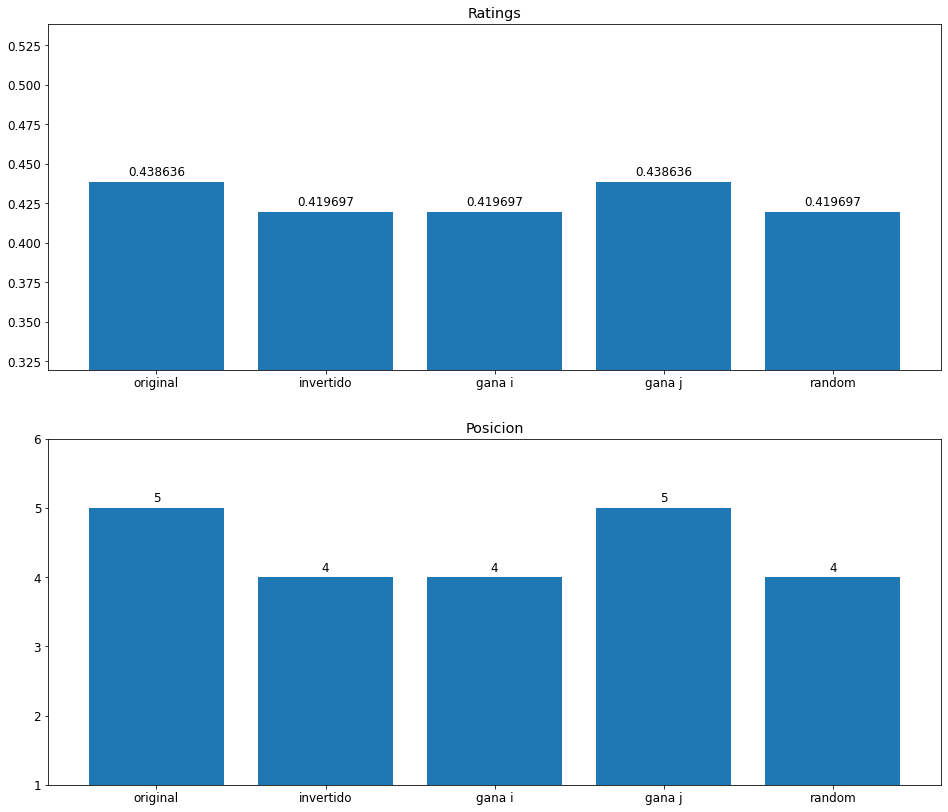

In [25]:
np.random.seed(1)
cant_participantes = 6
cant_partidos = 12

(ro,po),(rin,pin),(ri,pi),(rj,pj),(rrand,prand) = experimento_2(6,12)

ratings = [ro,rin, ri, rj, rrand]
poss = [po,pin,pi,pj,prand]
labels = ["original", "invertido", "gana i", "gana j", "random"]

plt.figure(figsize = (16,14))

# Grafico rating
plt.subplot(2,1,1)
rec = plt.bar(labels, ratings)
plt.bar_label(rec, padding = 3)
plt.ylim(np.min(ratings)-0.1,np.max(ratings)+0.1)
plt.title("Ratings")

# Grafico posicion
plt.subplot(2,1,2)
rec = plt.bar(labels, poss)
plt.bar_label(rec, padding = 3)
plt.ylim(np.min(poss)-0.1,np.max(poss)+0.1)
plt.title("Posicion")
plt.yticks(np.arange(cant_participantes)+1)
plt.show()

## 10 participantes - 100 partidos

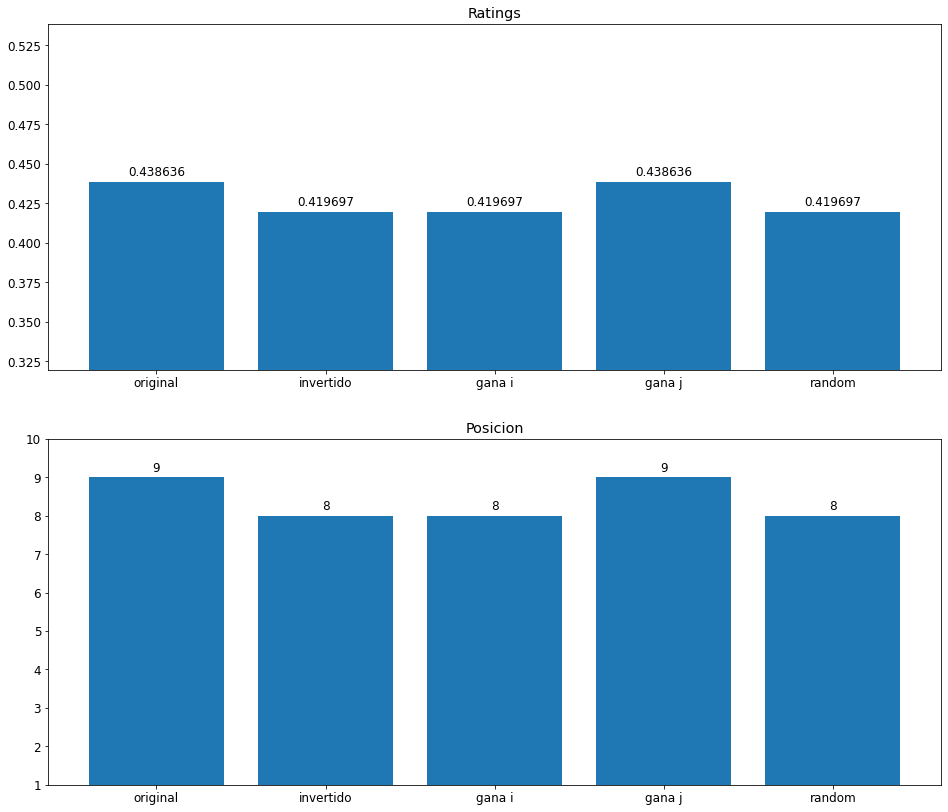

In [26]:
np.random.seed(1)
cant_participantes = 10
cant_partidos = 100

(ro,po),(rin,pin),(ri,pi),(rj,pj),(rrand,prand) = experimento_2(6,12)

ratings = [ro,rin, ri, rj, rrand]
poss = [po,pin,pi,pj,prand]
labels = ["original", "invertido", "gana i", "gana j", "random"]

plt.figure(figsize = (16,14))

# Grafico rating
plt.subplot(2,1,1)
rec = plt.bar(labels, ratings)
plt.bar_label(rec, padding = 3)
plt.ylim(np.min(ratings)-0.1,np.max(ratings)+0.1)
plt.title("Ratings")

# Grafico posicion
plt.subplot(2,1,2)
rec = plt.bar(labels, poss)
plt.bar_label(rec, padding = 3)
plt.ylim(np.min(poss)-0.1,np.max(poss)+0.1)
plt.title("Posicion")
plt.yticks(np.arange(cant_participantes)+1)
plt.show()

## 20 participantes - 200 partidos

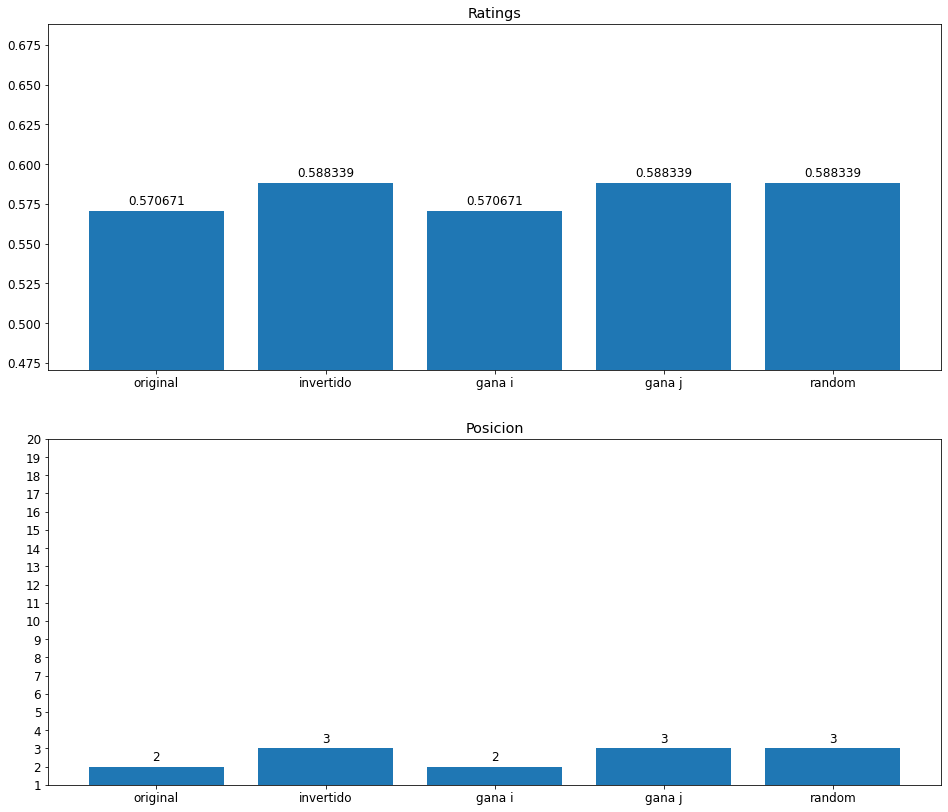

In [30]:
np.random.seed(4)
cant_participantes = 20
cant_partidos = 200

(ro,po),(rin,pin),(ri,pi),(rj,pj),(rrand,prand) = experimento_2(6,12)

ratings = [ro,rin, ri, rj, rrand]
poss = [po,pin,pi,pj,prand]
labels = ["original", "invertido", "gana i", "gana j", "random"]

plt.figure(figsize = (16,14))

# Grafico rating
plt.subplot(2,1,1)
rec = plt.bar(labels, ratings)
plt.bar_label(rec, padding = 3)
plt.ylim(np.min(ratings)-0.1,np.max(ratings)+0.1)
plt.title("Ratings")

# Grafico posicion
plt.subplot(2,1,2)
rec = plt.bar(labels, poss)
plt.bar_label(rec, padding = 3)
plt.ylim(np.min(poss)-0.1,np.max(poss)+0.1)
plt.title("Posicion")
plt.yticks(np.arange(cant_participantes)+1)
plt.show()